# Assignment: Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

### Введение

Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.
### Материалы

    Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
    Matplotlib User Guide: http://matplotlib.org/users/index.html

### Инструкция по выполнению

Данное задание состоит из трех частей. В каждой ответом будет набор чисел

http://docs.scipy.org/doc/scipy/reference/optimize.html## Задача 1. Минимизация гладкой функции

1. Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]
2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
4. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
5. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1.
6. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1.
7. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции, можно увидеть, в какие именно минимумы мы попали.

In [108]:
import numpy as np
from scipy.optimize import minimize, differential_evolution
from matplotlib import pyplot as plt

In [109]:
def f(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(-x / 2.)

x_1 = 2
x_2 = 15
x_3 = 30
minimum_1 = minimize(f, x0=x_1)
minimum_2 = minimize(f, x0=x_2)
minimum_3 = minimize(f, x0=x_3)

print(f"Результат с начальным приближением x = {x_1}:\n" +
      f"x = {minimum_1.x}, " + f"f(x) = {minimum_1.fun}")
print(f"Результат с начальным приближением x = {x_2}:\n" +
      f"x = {minimum_2.x}, " + f"f(x) = {minimum_2.fun}")
print(f"Результат с начальным приближением x = {x_3}:\n" +
      f"x = {minimum_3.x}, " + f"f(x) = {minimum_3.fun}")

Результат с начальным приближением x = 2:
x = [4.13627628], f(x) = 1.7452682903447336
Результат с начальным приближением x = 15:
x = [24.67766111], f(x) = -11.503580766270698
Результат с начальным приближением x = 30:
x = [25.88019321], f(x) = -11.898894665981313


### При x = 1, 15, 30 мы получаем разные минимумы

In [110]:
x_bfgs_1 = 2
x_bfgs_2 = 30

minimum_bfgs_1 = minimize(f, x0=x_bfgs_1, method="BFGS")
minimum_bfgs_2 = minimize(f, x0=x_bfgs_2, method="BFGS")


print(f"Результат с начальным приближением x = {x_bfgs_1}:\n" +
      f"x = {minimum_bfgs_1.x[0]}, " + f"f(x) = {minimum_bfgs_1.fun}")
print(f"Результат с начальным приближением x = {x_bfgs_2}:\n" +
      f"x = {minimum_bfgs_2.x[0]}, " + f"f(x) = {minimum_bfgs_2.fun}")

Результат с начальным приближением x = 2:
x = 4.136276281772837, f(x) = 1.7452682903447336
Результат с начальным приближением x = 30:
x = 25.880193206142593, f(x) = -11.898894665981313


### Получили ответы при x = 2 и x = 30. Ответы разные, потому что при разных x метод "попадает" в разные локальные минимумы.
### Наглядно представим минимумы и функцию на графике:

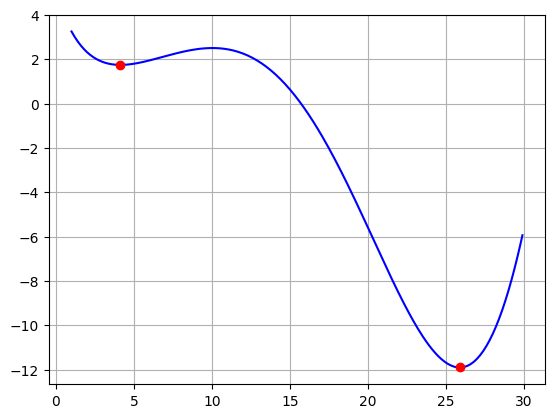

In [111]:
x = np.arange(1, 30, 0.1)
y = f(x)

plt.plot(x, y, color="blue")
plt.plot(minimum_bfgs_1.x[0], minimum_bfgs_1.fun, color="red", marker="o")
plt.plot(minimum_bfgs_2.x[0], minimum_bfgs_2.fun, color="red", marker="o")
plt.grid()

## Задача 2: Глобальная оптимизация

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации - дифференциальную эволюцию.
2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
5. Дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [112]:
global_de = differential_evolution(bounds=[(1, 30)], func=f)

print("Минимум функции на [1, 30] с использованием метода дифференциальной эволюции: " + f"{global_de.fun:.2f}\n")


Минимум функции на [1, 30] с использованием метода дифференциальной эволюции: -11.90



## Задача 3. Минимизация негладкой функции

1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Постройте график h(x) с помощью matplotlib.
3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании.
5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

Найденные минимумы функции h(x) с помощью разных методов:
BFGS: -5
Differential Evolution: -11.0


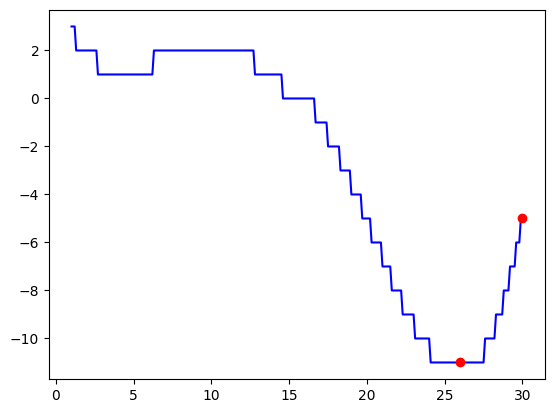

In [113]:
def h(x):
    return [int(f(i)) for i in x]
    
y_h = h(x)

minimum_bfgs_h = minimize(h, x0=np.array(30), method="BFGS")
minimum_de_h = differential_evolution(bounds=[(1, 30)], func=h)
print("Найденные минимумы функции h(x) с помощью разных методов:")
print("BFGS: " + str(minimum_bfgs_h.fun))
print("Differential Evolution: " + str(minimum_de_h.fun))

plt.plot(x, y_h, color='blue')
plt.plot(minimum_bfgs_h.x, minimum_bfgs_h.fun, color='red', marker="o")
plt.plot(minimum_de_h.x, minimum_de_h.fun, color='red', marker="o")

###

### BFGS не умеет справляться со ступенчатыми функциями, так как использует градиент, чтобы найти направление спуска функции.